In [1]:
#11-14 Individual Project 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from IPython.display import display
import plotly
import plotly.plotly as py
py.sign_in("cjbroll", "5VEhukXUvWeNe4fgDwJQ")
plotly.offline.init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [8]:
#read in fbi dataset

#https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-6/table-6.xls/view
fbi_city_data = pd.read_excel("FBI_Crime_Report_2010_2016.xlsx", header=3, skip_footer=11)
fbi_city_data.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,ALABAMA,Abbeville,2608.0,11.0,0,1.0,NaN,0.0,10.0,51.0,12.0,34.0,5.0,NaN
1,NaN,Adamsville,4377.0,19.0,0,0.0,NaN,10.0,9.0,250.0,33.0,201.0,16.0,NaN
2,NaN,Addison,738.0,1.0,0,0.0,NaN,0.0,1.0,14.0,1.0,11.0,2.0,NaN
3,NaN,Alabaster,33040.0,97.0,1,2.0,NaN,2.0,92.0,488.0,58.0,411.0,19.0,NaN
4,NaN,Albertville,21525.0,29.0,0,5.0,NaN,10.0,14.0,721.0,190.0,462.0,69.0,NaN


In [9]:
#replace nan's with 0
fbi_city_data = fbi_city_data.fillna(0)
States = fbi_city_data["State"].unique().tolist() #create list of states
States.remove(0) #remove 0's from list
fbi_city_data.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,ALABAMA,Abbeville,2608.0,11.0,0,1.0,0.0,0.0,10.0,51.0,12.0,34.0,5.0,0.0
1,0,Adamsville,4377.0,19.0,0,0.0,0.0,10.0,9.0,250.0,33.0,201.0,16.0,0.0
2,0,Addison,738.0,1.0,0,0.0,0.0,0.0,1.0,14.0,1.0,11.0,2.0,0.0
3,0,Alabaster,33040.0,97.0,1,2.0,0.0,2.0,92.0,488.0,58.0,411.0,19.0,0.0
4,0,Albertville,21525.0,29.0,0,5.0,0.0,10.0,14.0,721.0,190.0,462.0,69.0,0.0


In [10]:
#replace 0's with states
l=[]
i=0
for state in States:
    if i<len(States)-1: #avoid surpassing index of list
        start_index = fbi_city_data.index[fbi_city_data["State"]==States[i]][0] #state index
        end_index = fbi_city_data.index[fbi_city_data["State"]==States[i+1]][0] #consecutive state index

        l.append(fbi_city_data["State"][start_index:end_index].replace([state,0], state)) #create a list of states to replace fbi_data["states]
        i= i+1 #counter
    else:
        start_index = fbi_city_data.index[fbi_city_data["State"]==States[i]][0] #this is Wyoming, last state in list
        l.append(fbi_city_data["State"][start_index:].replace([state,0], state))
NewStates = pd.concat(l) #create df with states

In [11]:
#replace fbi_data["State"] with NewStates
NewStates = NewStates.str.lower().str.capitalize() #lowercase and capitalize state names

fbi_city_data["State"] = NewStates
fbi_city_data.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Alabama,Abbeville,2608.0,11.0,0,1.0,0.0,0.0,10.0,51.0,12.0,34.0,5.0,0.0
1,Alabama,Adamsville,4377.0,19.0,0,0.0,0.0,10.0,9.0,250.0,33.0,201.0,16.0,0.0
2,Alabama,Addison,738.0,1.0,0,0.0,0.0,0.0,1.0,14.0,1.0,11.0,2.0,0.0
3,Alabama,Alabaster,33040.0,97.0,1,2.0,0.0,2.0,92.0,488.0,58.0,411.0,19.0,0.0
4,Alabama,Albertville,21525.0,29.0,0,5.0,0.0,10.0,14.0,721.0,190.0,462.0,69.0,0.0


In [12]:
fbi_city_data.columns.values

array(['State', 'City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'], dtype=object)

In [13]:
#rename columns to be used
fbi_city_data = fbi_city_data.rename(columns={"Violent\ncrime":"Violent Crime","Murder and\nnonnegligent\nmanslaughter":"Murder"})
fbi_city_data.columns.values

array(['State', 'City', 'Population', 'Violent Crime', 'Murder',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'], dtype=object)

In [14]:
#remove unecesary columns to examine Robbery
cols = ["City","State","Population", "Robbery", "Murder", "Violent Crime"]
fbi_city_data = fbi_city_data[cols]
fbi_city_data.head()

,City,State,Population,Robbery,Murder,Violent Crime
0,Abbeville,Alabama,2608.0,0.0,0,11.0
1,Adamsville,Alabama,4377.0,10.0,0,19.0
2,Addison,Alabama,738.0,0.0,0,1.0
3,Alabaster,Alabama,33040.0,2.0,1,97.0
4,Albertville,Alabama,21525.0,10.0,0,29.0


In [15]:
#change Population, Robbery, Murder and Violent Crime to integers
fbi_city_data["Population"] = fbi_city_data["Population"].astype(int)
fbi_city_data["Robbery"] = fbi_city_data["Robbery"].astype(int)
fbi_city_data["Murder"] = fbi_city_data["Murder"].astype(int)
fbi_city_data["Violent Crime"] = fbi_city_data["Violent Crime"].astype(int)

In [16]:
#create new column 'Robbery Per Capita'
fbi_city_data = fbi_city_data[fbi_city_data["Population"]!=0]  #avoid dividing by 0
fbi_city_data["Robbery Per Capita"] = np.round(np.divide(fbi_city_data["Robbery"], fbi_city_data["Population"]),4)
fbi_city_data.columns.values

array(['City', 'State', 'Population', 'Robbery', 'Murder', 'Violent Crime',
       'Robbery Per Capita'], dtype=object)

In [19]:
"""
Finds top robbery cities by count and sort list by robbery per capita

input: 
    df: dataframe  
    total: number of cities to rank

output: pd.DataFrame(top_cities_df): dataframe with cities sorted by Robbery and then Robbery Per Capita
"""
def top_robbery_cities(df, total=10):
    top_cities_df = df.sort_values(by="Robbery", ascending =False).head(total)
    top_cities_df = top_cities_df.sort_values(by="Robbery Per Capita", ascending =False).head(total)

    top_cities_df = top_cities_df.reset_index()
    top_cities_df.index = top_cities_df.index + 1 
    
    del top_cities_df["index"]
    
    return pd.DataFrame(top_cities_df)

In [20]:
#create df to find top robbery cities
top_robbery_cities = top_robbery_cities(fbi_city_data)
top_robbery_cities

,City,State,Population,Robbery,Murder,Violent Crime,Robbery Per Capita
1,Baltimore,Maryland,618385,5236,318,11010,0.0085
2,Milwaukee,Wisconsin,600193,3283,141,9201,0.0055
3,Indianapolis,Indiana,866351,3976,148,11907,0.0046
4,Chicago,Illinois,2725153,11957,765,30126,0.0044
5,Houston,Texas,2334348,9962,301,23960,0.0043
6,Philadelphia,Pennsylvania,1570826,6199,273,15534,0.0039
7,Dallas,Texas,1320939,4604,171,10071,0.0035
8,Las Vegas Metropolitan Police Department,Nevada,1592178,4974,158,13520,0.0031
9,Los Angeles,California,4007905,10307,293,28817,0.0026
10,New York,New york,8566917,15544,335,49124,0.0018


In [21]:
#rename Las Vegas and New york to New York 
top_robbery_cities = top_robbery_cities.replace({"Las Vegas Metropolitan Police Department":"Las Vegas", "New york":"New York"})
del top_robbery_cities["Population"]
top_robbery_cities

,City,State,Robbery,Murder,Violent Crime,Robbery Per Capita
1,Baltimore,Maryland,5236,318,11010,0.0085
2,Milwaukee,Wisconsin,3283,141,9201,0.0055
3,Indianapolis,Indiana,3976,148,11907,0.0046
4,Chicago,Illinois,11957,765,30126,0.0044
5,Houston,Texas,9962,301,23960,0.0043
6,Philadelphia,Pennsylvania,6199,273,15534,0.0039
7,Dallas,Texas,4604,171,10071,0.0035
8,Las Vegas,Nevada,4974,158,13520,0.0031
9,Los Angeles,California,10307,293,28817,0.0026
10,New York,New York,15544,335,49124,0.0018


In [22]:
#create column 'city_state' and dataframe indexed by it
top_robbery_cities["CityState"] = top_robbery_cities["City"] + ", " + top_robbery_cities["State"]
top_robbery_cities_indexed = top_robbery_cities.drop(["City", "State"], axis=1).set_index(["CityState"])
top_robbery_cities_indexed

,Robbery,Murder,Violent Crime,Robbery Per Capita
CityState,,,,
"Baltimore, Maryland",5236,318,11010,0.0085
"Milwaukee, Wisconsin",3283,141,9201,0.0055
"Indianapolis, Indiana",3976,148,11907,0.0046
"Chicago, Illinois",11957,765,30126,0.0044
"Houston, Texas",9962,301,23960,0.0043
"Philadelphia, Pennsylvania",6199,273,15534,0.0039
"Dallas, Texas",4604,171,10071,0.0035
"Las Vegas, Nevada",4974,158,13520,0.0031
"Los Angeles, California",10307,293,28817,0.0026


In [23]:
#plots
"""
Plots stacked bar chart of Robbery as a portion of Violent Crime

input: 
    df: dataframe  
    limit: number of cities to plot

output: stacked bar chart
"""
def plot_robberyPerViolentCrime(df, limit=10):
    df = df.loc[:,["Violent Crime", "Robbery"]][:limit]
    df['Total Violent Crime'] = (df["Violent Crime"] - df["Robbery"])/10000
    df["Robbery"] =  df["Robbery"]/10000
    del df['Violent Crime']
    df.plot(kind='bar', stacked=True, sort_columns=True, figsize=(10,8))
    plt.ylabel('per 10k')
    plt.xlabel('')
    plt.legend(frameon = True, facecolor = 'w', edgecolor = 'b')
    plt.show()

"""
plots Robbery against Murder in bar chart

input: 
    df: dataframe  
    limit: number of cities to plot

output: horizontal bar chart
"""    
def plot_robberyVsMurder(df, limit=10):
    df = df.loc[:,["Murder","Robbery"]][:limit]
    df.plot(kind='barh', sort_columns=True, figsize=(10,8))
    plt.ylabel('')
    plt.xlabel('Number of Incidences in 2016')
    plt.legend(frameon = True, facecolor = 'w', edgecolor = 'b')
    plt.show()
    
"""
plots Robbery Per Capita in bar chart

input: 
    df: dataframe  
    limit: number of cities to plot

output: vertical bar chart
"""    
def plot_percapita(df, limit=10):
    df = df.loc[:,["Robbery Per Capita"]][:limit]
    df.plot(kind='bar', sort_columns=True, figsize=(10,8))
    plt.ylabel('per capita')
    plt.xlabel('')
    plt.legend(frameon = True, facecolor = 'w', edgecolor = 'b')
    plt.show()
    
#display function
"""
displays daraframe for all cities 

input: 
    df: dataframe 
    cols: the columns you would like to display, besides City and State
    limit: number of cities to display

output: 
    display(df[cols][:limit]): dataframe with relevant info
"""
def display_relevant(df, cols, limit=10): 
    cols = ["City", "State"]  + cols
    display(df[cols][:limit])

,City,State,Robbery,Violent Crime
1,Baltimore,Maryland,5236,11010
2,Milwaukee,Wisconsin,3283,9201
3,Indianapolis,Indiana,3976,11907
4,Chicago,Illinois,11957,30126
5,Houston,Texas,9962,23960
6,Philadelphia,Pennsylvania,6199,15534
7,Dallas,Texas,4604,10071
8,Las Vegas,Nevada,4974,13520
9,Los Angeles,California,10307,28817
10,New York,New York,15544,49124


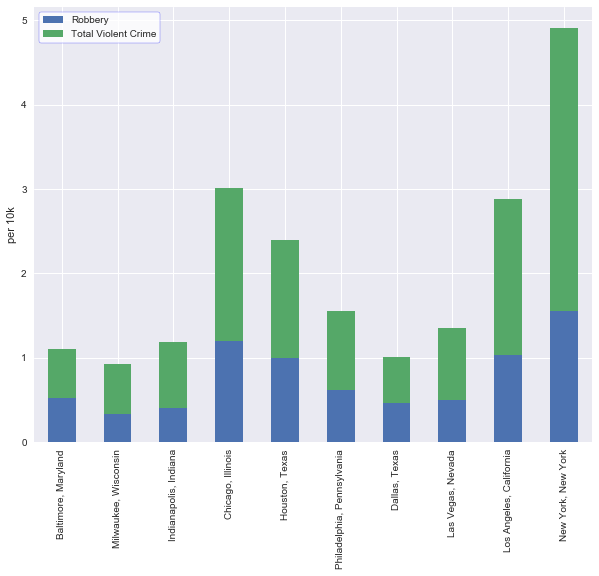

In [24]:
display_relevant(top_robbery_cities, ["Robbery", "Violent Crime"])
plot_robberyPerViolentCrime(top_robbery_cities_indexed)

,City,State,Robbery Per Capita
1,Baltimore,Maryland,0.0085
2,Milwaukee,Wisconsin,0.0055
3,Indianapolis,Indiana,0.0046
4,Chicago,Illinois,0.0044
5,Houston,Texas,0.0043
6,Philadelphia,Pennsylvania,0.0039
7,Dallas,Texas,0.0035
8,Las Vegas,Nevada,0.0031
9,Los Angeles,California,0.0026
10,New York,New York,0.0018


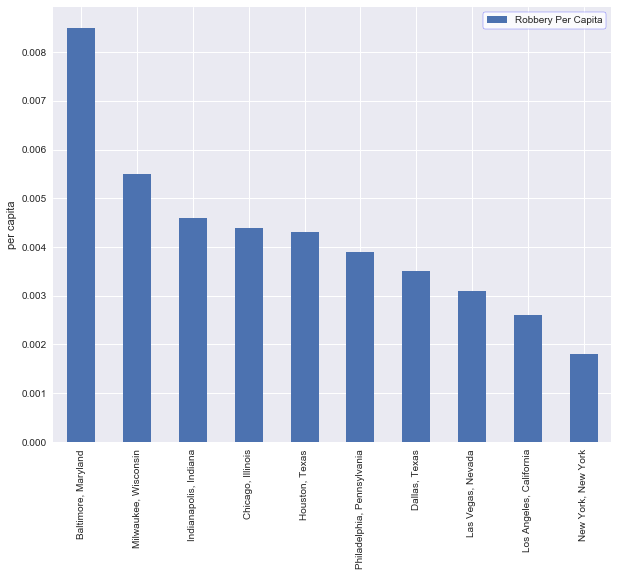

In [25]:
display_relevant(top_robbery_cities, ["Robbery Per Capita"])
plot_percapita(top_robbery_cities_indexed)

,City,State,Robbery,Murder
1,Baltimore,Maryland,5236,318
2,Milwaukee,Wisconsin,3283,141
3,Indianapolis,Indiana,3976,148
4,Chicago,Illinois,11957,765
5,Houston,Texas,9962,301
6,Philadelphia,Pennsylvania,6199,273
7,Dallas,Texas,4604,171
8,Las Vegas,Nevada,4974,158
9,Los Angeles,California,10307,293
10,New York,New York,15544,335


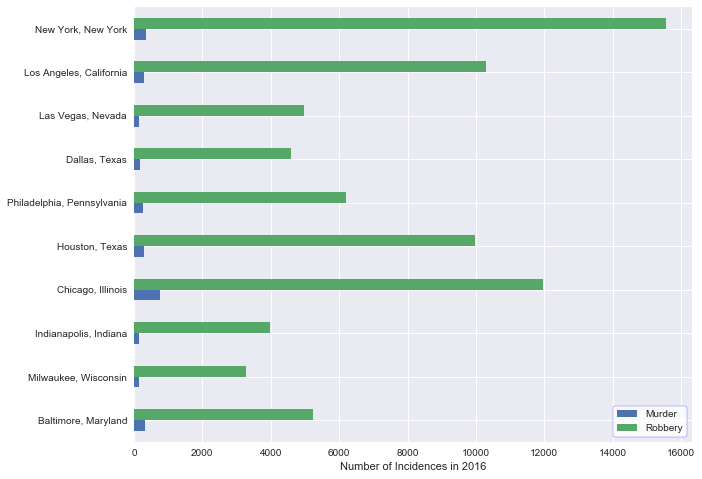

In [26]:
display_relevant(top_robbery_cities, ["Robbery", "Murder"])
plot_robberyVsMurder(top_robbery_cities_indexed)

In [83]:
#read in robbery data
#Note that Illinois numbers are underreported in 2016

#https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-13
robbery_by_weapon = pd.read_excel("robbery_by_weapon_and_state_2010-2016.xlsx", sheetname="2016", header=3, skip_footer=2)
robbery_by_weapon.head()

,State,Total robberies1,Firearms,Knives or cutting instruments,Other weapons,Strong- arm,Agency count,Population,Unnamed: 8,Unnamed: 9
0,Alabama,4415,2876,143,369,1027,264,4392449,NaN,NaN
1,Alaska,848,242,81,116,409,32,738566,NaN,NaN
2,Arizona,6882,3002,802,716,2362,90,6514042,,NaN
3,Arkansas,2045,1096,120,176,653,272,2827056,NaN,NaN
4,California,54762,15489,5207,6063,28003,732,39209622,NaN,NaN


In [28]:
robbery_by_weapon.columns.values

array(['State', 'Total\nrobberies1', 'Firearms',
       'Knives or\ncutting\ninstruments', 'Other\nweapons', 'Strong-\narm',
       'Agency\ncount', 'Population', 'Unnamed: 8', 'Unnamed: 9'], dtype=object)

In [29]:
#change names of columns to be used
robbery_by_weapon = robbery_by_weapon.rename(columns={"Total\nrobberies1":"Total Robberies", "Knives or\ncutting\ninstruments":"Cutting Instruments","Other\nweapons":"Other Weapons","Strong-\narm":"No Weapons"})
robbery_by_weapon.columns.values

array(['State', 'Total Robberies', 'Firearms', 'Cutting Instruments',
       'Other Weapons', 'No Weapons', 'Agency\ncount', 'Population',
       'Unnamed: 8', 'Unnamed: 9'], dtype=object)

In [30]:
#get rid of unecessary columns
robbery_by_weapon = robbery_by_weapon.drop(["Agency\ncount", "Population", "Unnamed: 8", "Unnamed: 9"], axis=1)
robbery_by_weapon.head()

,State,Total Robberies,Firearms,Cutting Instruments,Other Weapons,No Weapons
0,Alabama,4415,2876,143,369,1027
1,Alaska,848,242,81,116,409
2,Arizona,6882,3002,802,716,2362
3,Arkansas,2045,1096,120,176,653
4,California,54762,15489,5207,6063,28003


In [31]:
#create columns containing percentage of robberies by weapon
robbery_by_weapon = robbery_by_weapon[robbery_by_weapon["Total Robberies"]!=0] #avoid dividing by 0

fields = robbery_by_weapon.columns.values.tolist()
fields.remove("State")
fields.remove("Total Robberies")

for field in fields:
    robbery_by_weapon[field + "_%"] = np.round(np.divide(robbery_by_weapon[field], robbery_by_weapon["Total Robberies"])*100,2)
robbery_by_weapon.columns.values

array(['State', 'Total Robberies', 'Firearms', 'Cutting Instruments',
       'Other Weapons', 'No Weapons', 'Firearms_%',
       'Cutting Instruments_%', 'Other Weapons_%', 'No Weapons_%'], dtype=object)

In [32]:
#create list with states from dataframe 'top_robbery_cities'
top_states = top_robbery_cities["State"].unique().tolist()
top_states

['Maryland',
 'Wisconsin',
 'Indiana',
 'Illinois',
 'Texas',
 'Pennsylvania',
 'Nevada',
 'California',
 'New York']

In [33]:
#create a dataframe with states from top_robbery_cities and weapons used in robberies by percentage
top_states_df = pd.DataFrame({"State":top_states})
robbery_by_weapon_states = pd.merge(top_states_df,robbery_by_weapon, left_on="State", right_on="State")
robbery_by_weapon_states

,State,Total Robberies,Firearms,Cutting Instruments,Other Weapons,No Weapons,Firearms_%,Cutting Instruments_%,Other Weapons_%,No Weapons_%
0,Maryland,9660,4008,1029,732,3891,41.49,10.65,7.58,40.28
1,Wisconsin,4698,2557,222,393,1526,54.43,4.73,8.37,32.48
2,Indiana,6883,3420,360,586,2517,49.69,5.23,8.51,36.57
3,Illinois,536,307,24,48,157,57.28,4.48,8.96,29.29
4,Texas,33015,18312,2275,2733,9695,55.47,6.89,8.28,29.37
5,Pennsylvania,11764,5077,786,780,5121,43.16,6.68,6.63,43.53
6,Nevada,6340,2433,551,651,2705,38.38,8.69,10.27,42.67
7,California,54762,15489,5207,6063,28003,28.28,9.51,11.07,51.14
8,New York,22247,4648,2387,2122,13090,20.89,10.73,9.54,58.84


In [34]:
"""
Finds top fireamr robbery states

input: 
    df: dataframe 

output: 
    robbery_by_weapon_percent: dataframe sorted by used of firearms in robberies
"""
def top_by_firearm(df):
    #remove unecessary columns
    robbery_by_weapon_percent = df.drop(["Total Robberies", "Firearms","Cutting Instruments", "Other Weapons", "No Weapons"], axis=1)
    robbery_by_weapon_percent = robbery_by_weapon_percent.sort_values(by="Firearms_%", ascending=False)
    
    robbery_by_weapon_percent = robbery_by_weapon_percent.reset_index()
    robbery_by_weapon_percent.index = robbery_by_weapon_percent.index+1
    
    del robbery_by_weapon_percent["index"]
    
    return robbery_by_weapon_percent

In [35]:
top_by_firearm = top_by_firearm(robbery_by_weapon_states)
top_by_firearm

,State,Firearms_%,Cutting Instruments_%,Other Weapons_%,No Weapons_%
1,Illinois,57.28,4.48,8.96,29.29
2,Texas,55.47,6.89,8.28,29.37
3,Wisconsin,54.43,4.73,8.37,32.48
4,Indiana,49.69,5.23,8.51,36.57
5,Pennsylvania,43.16,6.68,6.63,43.53
6,Maryland,41.49,10.65,7.58,40.28
7,Nevada,38.38,8.69,10.27,42.67
8,California,28.28,9.51,11.07,51.14
9,New York,20.89,10.73,9.54,58.84


In [36]:
#transpose dataframe for pie charts
top_by_firearms_transpose = top_by_firearm.T

top_by_firearms_transpose = top_by_firearms_transpose.rename(columns={1:"Illinois",2:"Texas",3:"Wisconsin",4:"Indiana",5:"Pennsylvania",6:"Maryland",7:"Nevada",8:"California",9:"New York"})
top_by_firearms_transpose = top_by_firearms_transpose.drop(["State"])

top_by_firearms_transpose = top_by_firearms_transpose.rename(columns={"index":""})
top_by_firearms_transpose

,Illinois,Texas,Wisconsin,Indiana,Pennsylvania,Maryland,Nevada,California,New York
Firearms_%,57.28,55.47,54.43,49.69,43.16,41.49,38.38,28.28,20.89
Cutting Instruments_%,4.48,6.89,4.73,5.23,6.68,10.65,8.69,9.51,10.73
Other Weapons_%,8.96,8.28,8.37,8.51,6.63,7.58,10.27,11.07,9.54
No Weapons_%,29.29,29.37,32.48,36.57,43.53,40.28,42.67,51.14,58.84


In [39]:
#create a pie chart for df 'top robbery cities' states

def PiePlot(state):
    df = top_by_firearms_transpose.rename({"Firearms_%":"Firearms","No Weapons_%":"No Weapons", "Cutting Instruments_%":"Cutting Instruments", "Other Weapons_%":"Other Weapons"}, inplace=True)
    df = top_by_firearms_transpose[state]
    df.plot(kind="pie",title = state + " (Robberies in 2016)", subplots=True, autopct="%0.2f%%", fontsize=15, figsize=(10,10),legend=False, shadow=True, explode=(0.15,0,0,0), startangle=90)
    plt.ylabel("")
    plt.show()


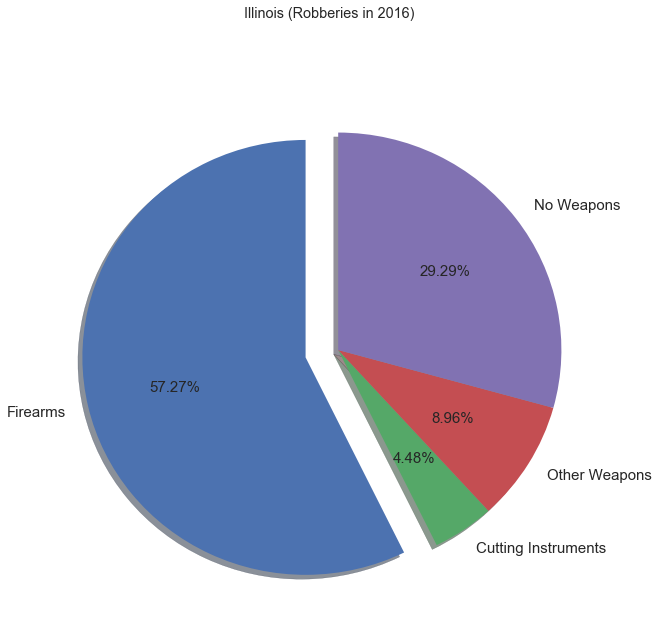

In [40]:
PiePlot("Illinois")

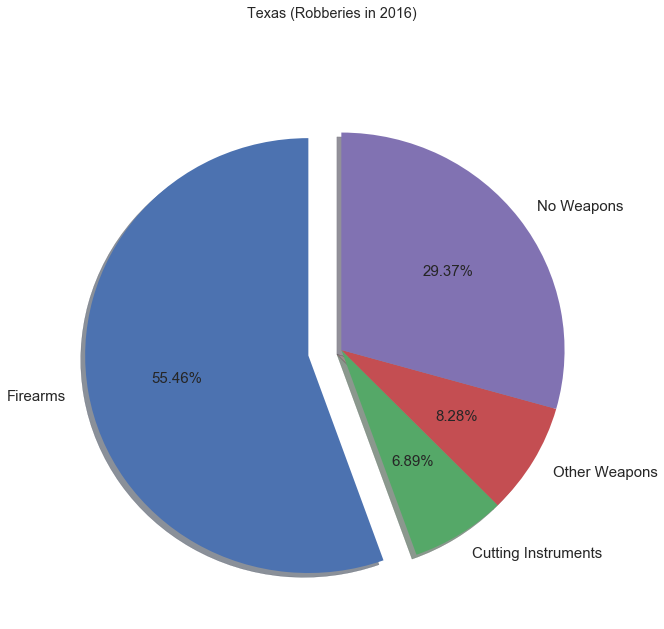

In [41]:
PiePlot("Texas")

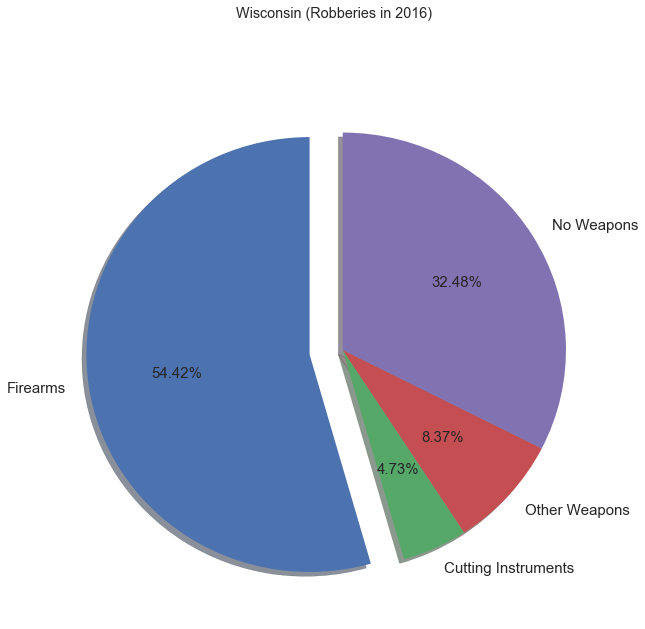

In [42]:
PiePlot("Wisconsin")

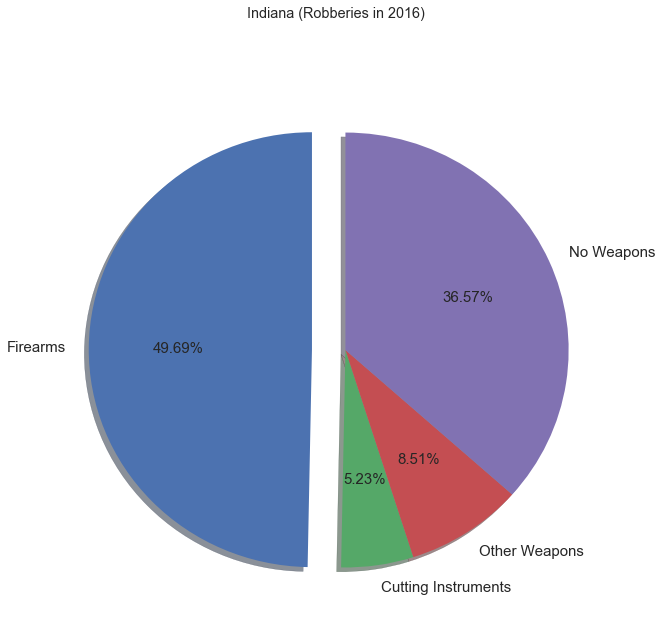

In [43]:
PiePlot("Indiana")

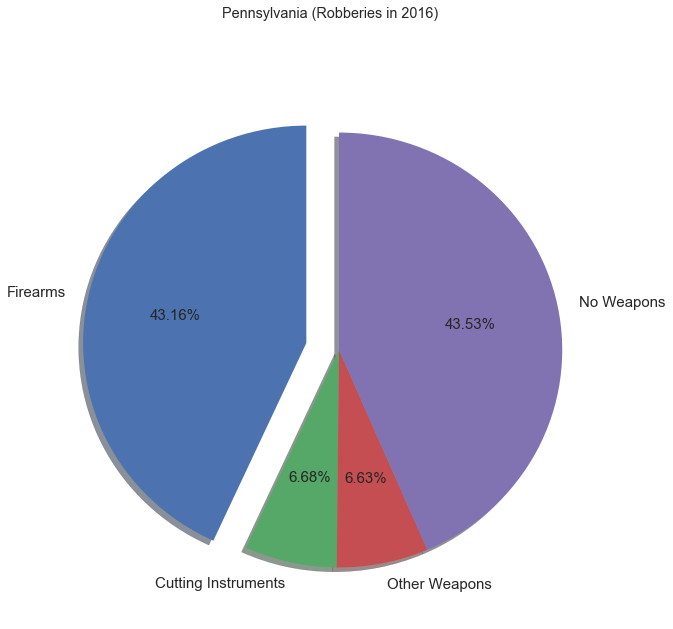

In [44]:
PiePlot("Pennsylvania")

In [47]:
#create df of robbery by firearms from years 2010-2016
years=["2010","2011","2012","2013","2014","2016"]
robbery_by_firearms = top_states_df.sort_values(by="State") #intialize df

for year in years:
    robbery_df = pd.read_excel("robbery_by_weapon_and_state_2010-2016.xlsx", sheetname=year, header=3)
    robbery_df = robbery_df[["State","Firearms"]]
    robbery_df= robbery_df.rename(columns={"Firearms": year})
    robbery_by_firearms = pd.merge(robbery_by_firearms,robbery_df, left_on="State", right_on="State")
    
robbery_by_firearms = robbery_by_firearms.rename(columns={"State":"Year"}) #change index name to year, before transpose
robbery_by_firearms_indexed = robbery_by_firearms.set_index(["Year"])
robbery_by_firearms_indexed.T

Year,California,Illinois,Indiana,Maryland,Nevada,New York,Pennsylvania,Texas,Wisconsin
2010,18053.0,240.0,1122.0,3266.0,1722.0,2540.0,6574.0,16280.0,2344.0
2011,16146.0,291.0,2953.0,4611.0,1703.0,2516.0,6483.0,12058.0,2393.0
2012,16940.0,211.0,2976.0,4206.0,1690.0,2450.0,6416.0,14697.0,2258.0
2013,16282.0,194.0,3353.0,3316.0,1846.0,6451.0,5726.0,15804.0,2377.0
2014,13533.0,209.0,3354.0,3304.0,2235.0,5681.0,5710.0,15248.0,2753.0
2016,15489.0,307.0,3420.0,4008.0,2433.0,4648.0,5077.0,18312.0,2557.0


Year,California,Illinois,Indiana,Maryland,Nevada,New York,Pennsylvania,Texas,Wisconsin
2010,18053,240,1122,3266,1722,2540,6574,16280,2344
2011,16146,291,2953,4611,1703,2516,6483,12058,2393
2012,16940,211,2976,4206,1690,2450,6416,14697,2258
2013,16282,194,3353,3316,1846,6451,5726,15804,2377
2014,13533,209,3354,3304,2235,5681,5710,15248,2753
2016,15489,307,3420,4008,2433,4648,5077,18312,2557


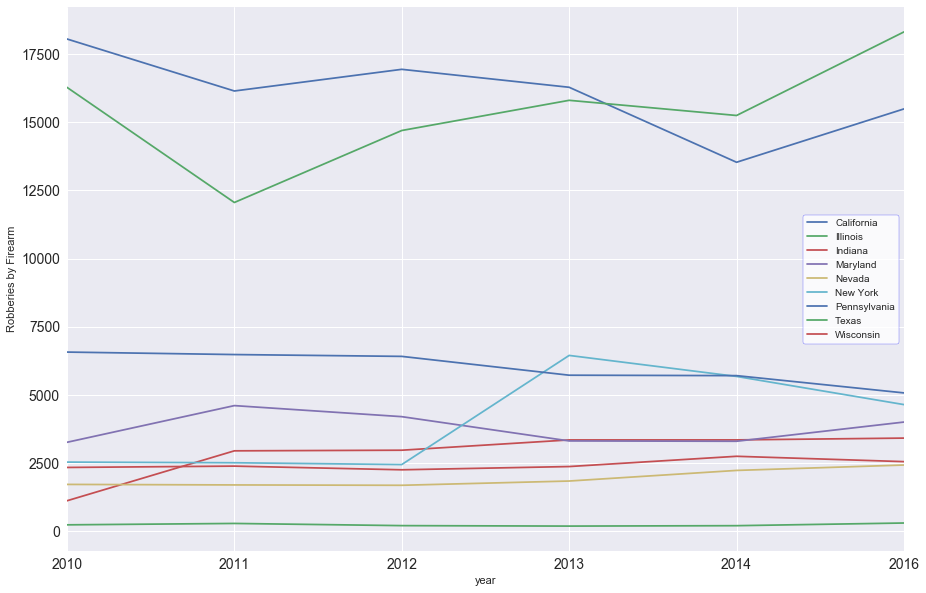

In [48]:
#plot dataframe robbery_by_firearms_indexed
df = robbery_by_firearms_indexed.T.astype(int)

df.plot(kind="line",figsize=(15,10),fontsize=14)
plt.legend(frameon = True, facecolor = 'w', edgecolor = 'b')
plt.ylabel('Robberies by Firearm')
plt.xlabel('year')

display(df)
plt.show()


In [49]:
#read in ATF Firearms Trace Data and state abbrevations dataset

#https://www.atf.gov/resource-center/firearms-trace-data-2016
firearms_trace = pd.read_excel("final_source_recovery_by_state_2016-2010.xlsx", sheetname="2016", header=1, skip_footer=7)
firearms_trace = firearms_trace.drop(["Source State", "TOTAL"], axis=1)
firearms_trace.head()

#https://statetable.com/
states_abbreviation = pd.read_csv("state_table.csv")

In [50]:
#index firearms_trace dataframe by state
firearms_trace = firearms_trace.rename(columns={"Unnamed: 1":"state"})
firearms_trace.columns.values

array(['state', 'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'GUAM & NORTHERN MARIANA ISLANDS', 'HAWAII',
       'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA',
       'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'US VIRGIN ISLANDS', 'UTAH',
       'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN',
       'WYOMING'], dtype=object)

In [51]:
#states abbreviations
states_abbreviation = states_abbreviation.sort_values("name")
states_abbreviation["name"] = states_abbreviation["name"].str.upper()


In [52]:
cols = ["name", "abbreviation"]

states_abbreviation = states_abbreviation[cols]
states_abbreviation.head()

,name,abbreviation
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA


In [53]:
#merge state abbreviations with FTA data
firearms_trace = pd.merge(firearms_trace, states_abbreviation, left_on="state", right_on="name").drop("name", axis=1)

In [54]:
firearms_trace.head()

,state,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,US VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,abbreviation
0,ALABAMA,3692,2,15,9,107,26,4,0,28,...,101,0,5,0,32,10,4,19,0,AL
1,ALASKA,1,696,17,1,70,16,0,2,4,...,19,0,1,0,5,28,1,5,0,AK
2,ARIZONA,14,10,5262,8,1868,70,0,2,5,...,137,1,24,0,12,45,3,17,2,AZ
3,ARKANSAS,12,2,9,1484,108,15,0,1,1,...,125,0,2,0,10,8,1,15,1,AR
4,CALIFORNIA,15,12,188,13,16876,79,5,5,11,...,115,1,41,0,22,100,10,14,5,CA


In [55]:
#set index to "state"
firearms_trace = firearms_trace.set_index("state")

In [56]:
#create new column "Total Recovered"
firearms_trace["Total Recovered"] = firearms_trace.sum(axis=0)

In [57]:
#move abbrevitions column to first column of df
cols = firearms_trace.columns.values.tolist()
cols = cols[-2:] + cols[:-2]
firearms_trace = firearms_trace[cols]

In [58]:
firearms_trace.head()

,abbreviation,Total Recovered,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,TENNESSEE,TEXAS,US VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
state,,,,,,,,,,,,,,,,,,,,,
ALABAMA,AL,4585,3692,2,15,9,107,26,4,0,...,156,101,0,5,0,32,10,4,19,0
ALASKA,AK,841,1,696,17,1,70,16,0,2,...,3,19,0,1,0,5,28,1,5,0
ARIZONA,AZ,6628,14,10,5262,8,1868,70,0,2,...,23,137,1,24,0,12,45,3,17,2
ARKANSAS,AR,1924,12,2,9,1484,108,15,0,1,...,148,125,0,2,0,10,8,1,15,1
CALIFORNIA,CA,25186,15,12,188,13,16876,79,5,5,...,37,115,1,41,0,22,100,10,14,5


In [72]:
#set color scale for the folowing US mapping function
scale = [[0.0, 'rgb(223,221,228)'],
         [0.01, 'rgb(199,199,216)'],
         [0.05, 'rgb(169,170,201)'],
         [0.1, 'rgb(139,135,181)'],
         [1.0, 'rgb(63,20,122)']]

"""
For the year 2016, this maps the percentage of guns recovered for a particular state

input: 
    state: a state 

output: 
    py.iplot(fig, validate=False, filename='State_FTA'): interactive plotly US map 
"""
def mapper(state):
    display_state = state #to display in map
    state = state.upper()
    z = firearms_trace[state]/firearms_trace.loc[state,"Total Recovered"]*100
    z = z.round(2)
    data = [dict(type='choropleth',
                 colorscale=False,
                 locations=firearms_trace['abbreviation'],
                 z=z,
                 locationmode='USA-states',
                 text=firearms_trace['abbreviation'],
                 hoverinfo='location+z',
    marker=dict(line=dict(color='rgb(255,255,255)',
                          width=2)),
    colorbar=dict(title='Percentage of guns'))]
    
    layout = dict(title='Firearms Sourced and Recoverd in ' + display_state + ' 2016'+'<br />(Hover for value)',
                  geo=dict(scope='USA',
                          projection=dict(type='albers usa'),
                          showlakes=True,
                          lakecolor='rgb(95,145,237)'))
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False,
                    filename='State_FTA')


In [73]:
mapper("Illinois")

In [74]:
mapper("Indiana")

In [75]:
mapper("Wisconsin")

In [76]:
mapper("Texas")

In [77]:
mapper("California")

In [78]:
mapper("Nevada")

In [79]:
mapper("Pennsylvania")

In [80]:
mapper("New York")

In [81]:
mapper("Maryland")